# PCA - MNIST

En éste ejercicio vamos a aplicar PCA y K-means al digits dataset similar a MNIST, que incluye imágenes de dígitos de 8x8 píxeles. La idea es intentar recopilar información sobre la distribución de las imágenes, usando visualizaciones que permitan clarificar cómo interpretar los resultados obtenidos por PCA.

### Importamos librerías

In [136]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import os
import gzip
import sys
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import normalize 
from sklearn.datasets import load_digits
from sklearn.cluster  import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

In [137]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

RANDOM_STATE = 0

### Importamos el dataset

In [138]:
# Cargamos los datos de training
x, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(x.shape))
X = pd.DataFrame(x)
X.head()

Formato del dataset: (1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [139]:
TRAIN_SIZE = 0.8
x_train,x_test, y_train, y_test =  train_test_split(x,y,train_size = TRAIN_SIZE,shuffle =True,random_state=RANDOM_STATE)

In [140]:
print('Formato de las etiquetas: {}'.format(y_train.shape))

Formato de las etiquetas: (1437,)


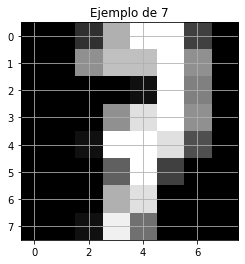

In [141]:
# Cargamos una muestra
plt.grid(True)
plt.title("Ejemplo de {}".format(y_train[8]))
plt.imshow(x_train[8, :].reshape((8, 8)), cmap='gray')

---

## Consignas

Siguiendo los ejemplos vistos en clase sobre los datasets de Human Activity Recognition y Fashion MNIST, realizar las siguientes consignas:

1. Aplicar PCA sobre el dataset para poder explicar el 90% de la varianza. ¿Cuántos componentes se requieren?
2. Graficar un scree plot (varianza contemplada en función del número de componentes considerados)
3. Visualizar gráficamente los primeros 5 componentes ¿Qué conclusiones se puede sacar de cada componente? [OPCIONAL].
4. Visualizar la imagen original vs. la reconstruida con los $m$ componentes del punto 1.
5. Graficar una matriz de correlación del dataset reducido.
6. Graficar los clusters de dígitos en 2 y 3 dimensiones usando los componentes obtenidos en PCA.
7. Aplicar K-means para clusterizar los dígitos ¿Cómo son los resultados?
8. Realizar un gráfico de inercia para obtener el número óptimo de clusters $k$.
9. Analizar visualmente los límites del cluster de algún dígito y "generar" artificialmente el dígito dándole valores a los primeros dos componentes de PCA.

# Resolución

In [142]:
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(x_train)
X_pca = pca.transform(x_train)
X_test_pca = pca.transform(x_test)
# Cantidad de componentes necesarios
X_pca.shape[1]

21

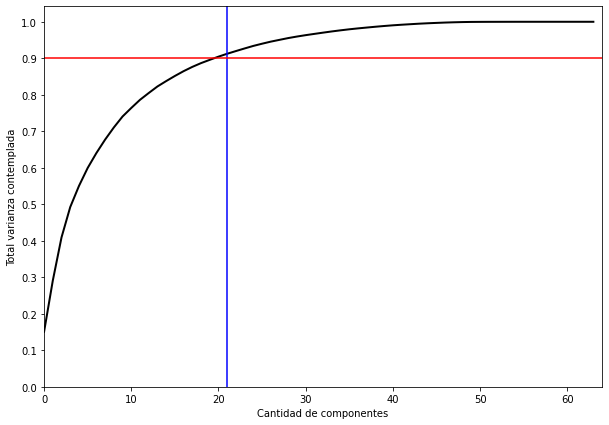

In [143]:
pca_aux = PCA(n_components=x_train.shape[1], random_state=RANDOM_STATE).fit(x_train)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_aux.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, X.shape[1])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(X_pca.shape[1], c='b')
plt.axhline(0.9, c='r')
plt.show();

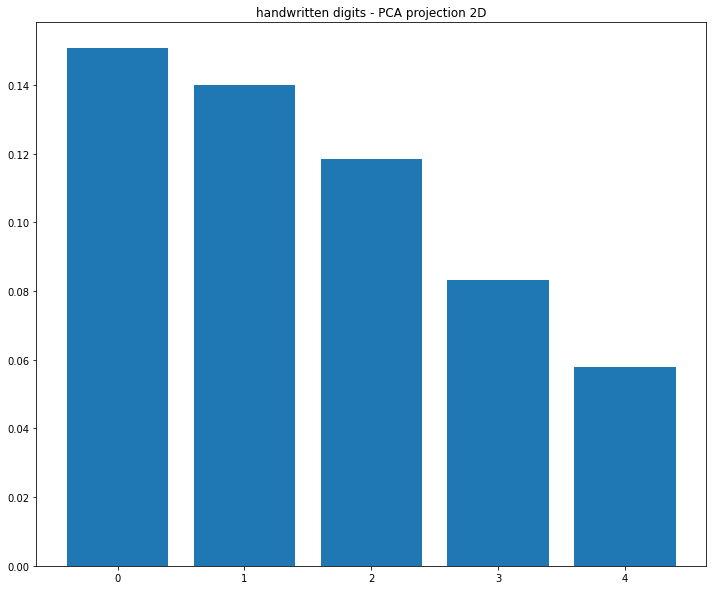

In [144]:
# Graficamos los primeros n componentes
n = 5
plt.figure(figsize=(12,10))
plt.bar(range(n),pca.explained_variance_ratio_[0:n])
plt.title('handwritten digits - PCA projection 2D');

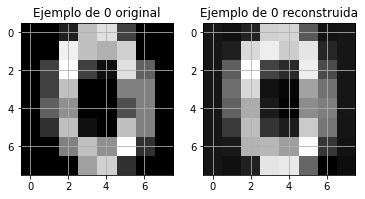

In [145]:
inverse = pca.inverse_transform(X_pca)
sample_number = 9
plt.figure()
plt.subplot(121)
plt.grid(True)
plt.title("Ejemplo de {} original".format(y_train[sample_number]))
plt.imshow(x_train[sample_number, :].reshape((8, 8)), cmap='gray')
plt.subplot(122)
plt.grid(True)
plt.title("Ejemplo de {} reconstruida".format(y_train[sample_number]))
plt.imshow(inverse[sample_number, :].reshape((8, 8)), cmap='gray')

In [146]:
df = pd.DataFrame(X_pca)
corr = df.corr()
corr.style.background_gradient(cmap='viridis').set_precision(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
1,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
2,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0
3,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0
4,0.0,-0.0,0.0,-0.0,1.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
5,0.0,-0.0,0.0,-0.0,0.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
6,0.0,0.0,-0.0,-0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
7,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
9,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0


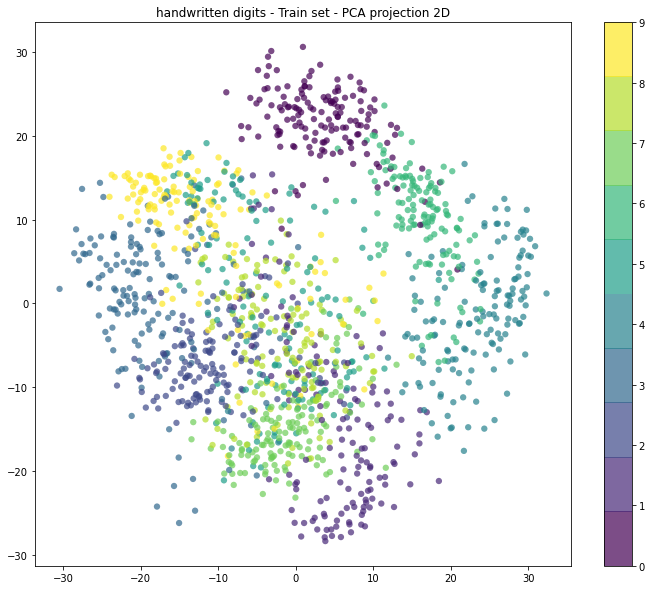

In [147]:
y_ = list(set(y))
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('viridis', len(y_)))
plt.colorbar()
plt.title('handwritten digits - Train set - PCA projection 2D');

Text(0.5, 0.92, 'handwritten digits - Train set -  projection 3D')

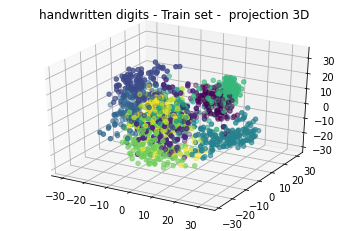

In [148]:
from mpl_toolkits import mplot3d
%matplotlib inline
y_ = list(set(y))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_train,marker='o',cmap=plt.cm.get_cmap('viridis', len(y_)))
plt.title('handwritten digits - Train set -  projection 3D')



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       151
           1       0.00      0.00      0.00       147
           2       0.05      0.06      0.05       141
           3       0.00      0.00      0.00       154
           4       0.00      0.00      0.00       151
           5       0.01      0.01      0.01       142
           6       0.96      0.97      0.96       137
           7       0.00      0.00      0.00       140
           8       0.05      0.03      0.04       135
           9       0.04      0.04      0.04       139

    accuracy                           0.11      1437
   macro avg       0.11      0.11      0.11      1437
weighted avg       0.11      0.11      0.11      1437



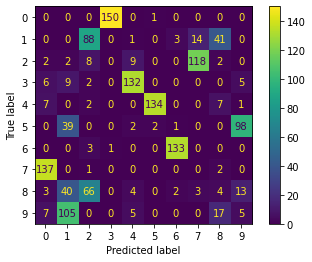

In [149]:
n_clusters = len(y_)
print(y_)
RANDOM_STATE = 50
kmeans_model = KMeans(n_clusters,random_state = RANDOM_STATE,max_iter=100 )
kmeans_model.fit(x_train)
y_pred = kmeans_model.predict(x_train)
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_train, y_pred))

In [150]:
inertia = []
n_clases = len(y_)
for k in range(1, n_clases + 1):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=RANDOM_STATE).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

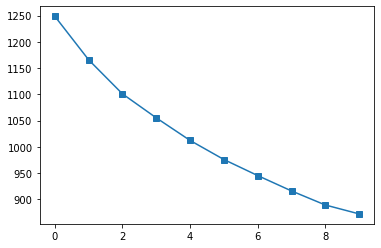

In [151]:
plt.plot(range(0, 10), inertia, marker='s')

Text(0.5, 1.0, 'componente 1 por digito')

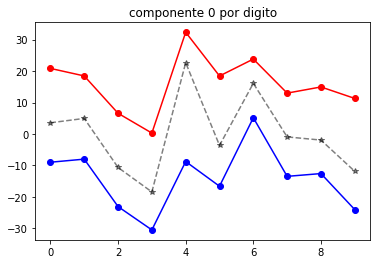

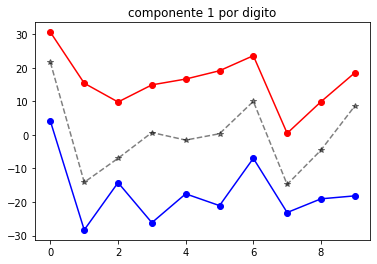

In [192]:
max_0 = []
mean_0 = []
min_0 = []
max_1 = []
mean_1 = []
min_1 = []

from pandas.core.internals.blocks import NumericBlock

for num in range(10):
  X_pca_numero = []
  for i,x in enumerate(X_pca):
    if y_train[i] == num:
      X_pca_numero.append(x)
  X_pca_numero = np.array(X_pca_numero)
  max_0.append(np.max(X_pca_numero[:,0]))
  mean_0.append(np.mean(X_pca_numero[:,0]))
  min_0.append(np.min(X_pca_numero[:,0]))
  max_1.append(np.max(X_pca_numero[:,1]))
  mean_1.append(np.mean(X_pca_numero[:,1]))
  min_1.append(np.min(X_pca_numero[:,1]))

plt.figure()
plt.plot(max_0,'-or')
plt.plot(mean_0,'--*k',alpha=0.5)
plt.plot(min_0,'-ob')
plt.title('componente 0 por digito')

plt.figure()
plt.plot(max_1,'-or')
plt.plot(mean_1,'--*k',alpha=0.5)
plt.plot(min_1,'-ob')
plt.title('componente 1 por digito')

In [195]:
min_0[num]

-8.753567681871425

[ 1.13726395e-16 -5.42672688e-16 -1.46484541e-16 -1.29580101e-15
 -8.04737858e-16 -6.45891753e-17 -3.20164524e-16  2.52175919e-16
  4.75920239e-16 -7.49728896e-16 -1.30754450e-15 -5.14241089e-16
 -7.97320920e-16 -8.73035503e-17 -3.94024873e-17 -3.86607934e-16
 -8.83851872e-17 -4.28482734e-16  1.51923629e-15  1.66881123e-16
 -9.44423539e-16]


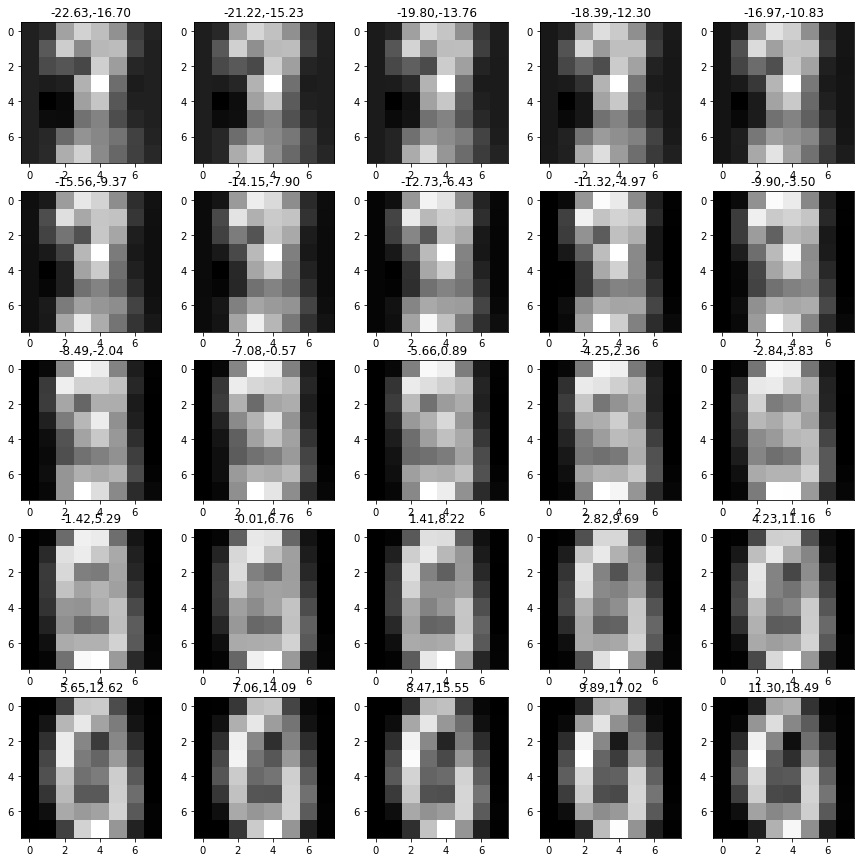

In [202]:
generated = np.mean(X_pca,axis=0)
print(generated)
cant = 25
num = 9
plt.figure(figsize=(15,15))
for i in range(cant):
  generated[0] = np.abs(max_0[num]-min_0[num])/cant*(i+1)+min_0[num]
  generated[1] = np.abs(max_1[num]-min_1[num])/cant*(i+1)+min_1[num]
  inverse = pca.inverse_transform(generated)
  ax = plt.subplot(5,5,i+1)
  plt.title('{:.2f},{:.2f}'.format(generated[0],generated[1]))
  plt.imshow(inverse.reshape((8, 8)), cmap='gray')


# Conclusiones

Se observa que la estrategia de K-Means para clusterizar los datos del dataset no es efectiva incluso luego de realizar un analisis de componentes principales. El analisis de la inercia luego de la clusterización no muestra un codo marcado, lo cual no arrojaría un número de clusters óptimo frente a las otras opciones.
Para la generación del digito utilizando las dos primeras componentes se analizó el rango de valores por categoría de los X_pca y se realizó un barrido de 25 saltos en ese rango para una categoría dada. El resto de los valores fueron reemplazados por la media en axis=0 de cada componente para todo el set X_pca. 
Sólo para algunos casos se observan números generados que se asemejan al número objetivo, la mayoría de las veces las muestras generadas se parecen a un "0" o un "6". 
Los rangos de variación de las dos primeras componentes entre las categorías es similar, lo cual indica que las muestras en el subespacio transformado no presentan la separación (o sectorización) que se esperaría.

